<a href="https://colab.research.google.com/github/mdjespc/tutoring/blob/main/FDIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Modify the "Banks" file as follows:


  o Add attributes to .read_csv( ... ) so that it ignores blank lines and extra columns in the data, but displays
a warning. (The data file has been intentionally corrupted and won't work until this has been
accomplished. Refer to the PowerPoint slides.


  o Print the State ('ST') & 'Closing Year' for rows 35 to 40 inclusively.


o Plot two graphs one above the other in a column using "subplot".


o One graph should plot states on the x-axis and failures on the y-axis sorted in descending order. The
other should plot years on the x-axis and failures on the y-axis unsorted.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
failed_banks = pd.read_csv('banklist.csv', error_bad_lines = False,
                     warn_bad_lines = True,
                     skip_blank_lines = True,
                     skipinitialspace = True)
failed_banks

b'Skipping line 6: expected 7 fields, saw 8\n'


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,13-Apr-17
1,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,17-Feb-17
2,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,13-Jan-17,13-Apr-17
3,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,17-Nov-16
4,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,19-Aug-16,17-Nov-16
...,...,...,...,...,...,...,...
545,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
546,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
547,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
548,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [27]:
#Transforming closing dates to closing years
failed_banks["Closing Year"] = 0

for i in range(len(failed_banks)):
    year = failed_banks.loc[i, "Closing Date"]
    year = int(year[-2:]) + 2000
    failed_banks.loc[i, "Closing Year"] = year

In [50]:
#Print the State ('ST') & 'Closing Year' for rows 35 to 40 inclusively.
failed_banks[['ST', 'Closing Year']].iloc[35:41]

,ST,Closing Year
35,FL,2013
36,TX,2013
37,CT,2013
38,AZ,2013
39,TN,2013
40,WI,2013


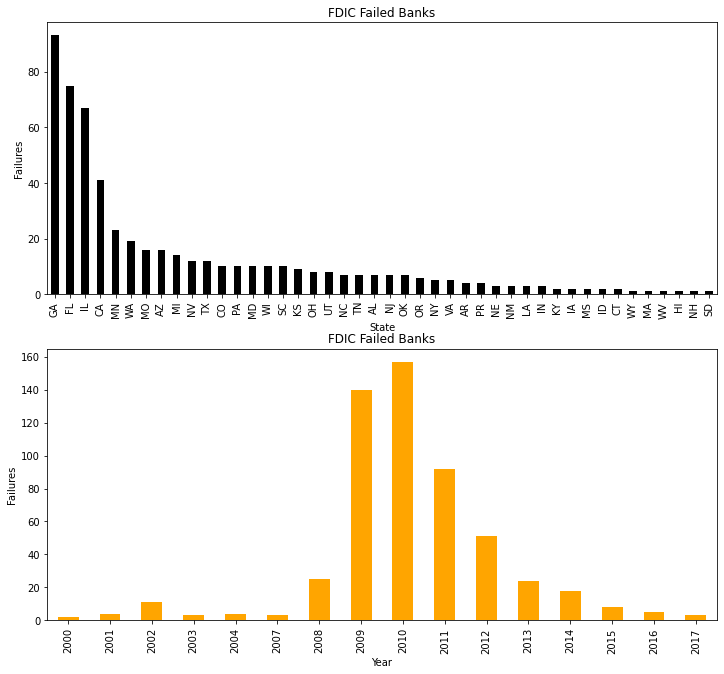

In [84]:
fig, (ax1, ax2) = plt.subplots(2, 1, num = "Bank Information", figsize= [12, 11])
ax1.set(xlabel = 'State', ylabel = 'Failures', title = 'FDIC Failed Banks')
ax2.set(xlabel = 'Year', ylabel = 'Failures', title = 'FDIC Failed Banks')

failed_banks["ST"].value_counts(sort = True).plot(kind = "bar", ax = ax1, color = "black")
failed_banks["Closing Year"].value_counts(sort=False).plot(kind="bar", ax = ax2, color = "orange")

plt.show()